# Bout, Stim, and Duration Post Hoc Analysis

In [1]:
import joblib
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
import time
from tkinter import *
import tkinter as tk
from tkinter import filedialog
from tqdm import tqdm
from tqdm import notebook
import itertools
import math
import seaborn as sns
import statistics 

In [2]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
infiles = filedialog.askopenfilename(multiple=True, title='load posthoc-predictions.npy')

%gui tk

In [3]:
infiles

('Z:/KayCei/VideoOutputCamera 0-27062023-092810_posthoc-predictions.npy',)

In [4]:
Random_List = [] #creates a array known as random list 
for f in range(len(infiles)):
    arr = np.load(infiles[f])
    Random_List.extend(arr) 

# Total Time of Video in deciseconds

In [5]:
print('This video is ', len(Random_List), ' deciseconds, which is', (len(Random_List)/600), 'minutes' )
print()
#print(Random_List)

This video is  39612  deciseconds, which is 66.02 minutes



# This is to remove any time period after 65 minutes

In [6]:
length_of_session = (int(input("How long was the session in minutes?"))) * 600
print(length_of_session)
Random_List = Random_List[:(length_of_session)]

How long was the session in minutes?65
39000


In [7]:
print('This video is ', len(Random_List), ' deciseconds, which is', (len(Random_List)/600), 'minutes' )
print()
#print(Random_List)

This video is  39000  deciseconds, which is 65.0 minutes



# Creates an array with tuples of (behavior type, stim count) 

In [8]:
behavior_type_and_duration = [] #this section of code creates a array with tuples that show (behavior type, duration(aka stim cont))
current_value = Random_List[0]
count = 0
for value in Random_List:
    if value==current_value:
        count += 1
    else:
        behavior_type_and_duration.append((current_value, count))
        current_value = value
        count = 1

# Append the final (current_value, count) pair outside the loop
behavior_type_and_duration.append((current_value, count))

# Make a copy of the original behavior_type_and_duration list
original_behavior_type_and_duration = list(behavior_type_and_duration)


In [9]:
#print(original_behavior_type_and_duration)

# Filtering Out Based on 3 Frame Rate

In [10]:
behavior_type_and_duration = [(behavior, duration) for behavior, duration in behavior_type_and_duration if duration >= 3]

In [11]:
#print(behavior_type_and_duration)

# Setting Behavior of Interest and File Info

trigger key 
0 left turns 
1 right turns
2 locomotion 
3 face grooms 
4 all other grooms 
5 all other behavior 

In [12]:
behavior_mapping = {
    0: "Left Turn ",
    1: "Right Turn ",
    2: "Locomotion ",
    3: "Face Groom ",
    4: "All Other Groom ",
    5: "All Other "
}

print("Please select the behavior of interest:")
for key, value in behavior_mapping.items():
    print(f"{key}: {value}")

behavior_of_interest = int(input("Enter the number corresponding to the behavior of interest: "))

behavior_name = behavior_mapping.get(behavior_of_interest, "Unknown")

print("Selected behavior of interest:", behavior_name)


Please select the behavior of interest:
0: Left Turn 
1: Right Turn 
2: Locomotion 
3: Face Groom 
4: All Other Groom 
5: All Other 
Enter the number corresponding to the behavior of interest: 3
Selected behavior of interest: Face Groom 


In [13]:
selection = input("Please enter the type of fiber connection for the trial (B for Bilateral, I for Ipsilateral, C for Contralateral): ")

if selection == 'b':
    type_of_fiber_connection = 'Bilateral'
elif selection == 'i':
    type_of_fiber_connection = 'Ipsilateral'
elif selection == 'c':
    type_of_fiber_connection = 'Contralateral'
else:
    type_of_fiber_connection = 'Unknown'

print("Selected type of fiber connection:", type_of_fiber_connection)


Please enter the type of fiber connection for the trial (B for Bilateral, I for Ipsilateral, C for Contralateral): b
Selected type of fiber connection: Bilateral


In [14]:
trial_type = ""

sham_session = input("Is it a Sham session? (y/n): ")

if sham_session.lower() == "y":
    trial_type = "Sham Session"

Is it a Sham session? (y/n): n


#  Total Bouts in a Session

In [15]:
#finds the number of bouts of a certain action
count = 0 #sets counter to zero
for x in behavior_type_and_duration:
    if x[0]==behavior_of_interest:
        count +=1
    
print(count,"bout(s) of",behavior_name) #print the bouts found 


140 bout(s) of Face Groom 


# Duration and Count for a Session

In [16]:
Duration_of_behavior_type=[]
count=0 #set counter to zero
for x in behavior_type_and_duration: # sets x equal to the elements in behavior type and duration 
    if x[0] == behavior_of_interest:  # if the first element of x is equal to the behavior of interest
        Duration_of_behavior_type.append((x[1])) #add the second element(count) of x to the array Duration of behavior type 
#print(Duration_of_behavior_type)        #this is to make sure you have the right values selected for 

#stim count calculation
Stim_count=(sum(Duration_of_behavior_type))
print(behavior_name,"was stimmed", Stim_count, "times")

duration_average= ((Stim_count/(len(Duration_of_behavior_type)))/10) # there are 10 deciseconds in a second. Thats why its divided by 10 
print("The average duration of", behavior_name, "is", duration_average, ' seconds')

Face Groom  was stimmed 1702 times
The average duration of Face Groom  is 1.2157142857142857  seconds


### Integrating Time

In [24]:
time_array=original_behavior_type_and_duration.copy()
time_array.insert(0, (0, 0))
#print(time_array)


In [25]:
time_array_and_behavior = []
for i, tuple in enumerate(time_array):
    if i > 0:
        previous_tuple = time_array_and_behavior[i-1]
        new_tuple = tuple + (tuple[1] + previous_tuple[2],)
    else:
        new_tuple = tuple + (tuple[1],)
    time_array_and_behavior.append(new_tuple)
#This block of code creates a list where the tuple are (behavior,duration, index of last element in the bout)

In [26]:
#time_array_and_behavior = [(sub_tuple[0], sub_tuple[1], index) for index, sub_tuple in enumerate(time_array)]

print(time_array_and_behavior)


[(0, 0, 0), (5.0, 61, 61), (3.0, 1, 62), (5.0, 1, 63), (3.0, 1, 64), (5.0, 1, 65), (3.0, 5, 70), (5.0, 122, 192), (0.0, 2, 194), (5.0, 2, 196), (0.0, 1, 197), (5.0, 3, 200), (0.0, 4, 204), (5.0, 20, 224), (0.0, 4, 228), (5.0, 4, 232), (2.0, 4, 236), (5.0, 1, 237), (2.0, 17, 254), (5.0, 1, 255), (0.0, 2, 257), (5.0, 10, 267), (3.0, 1, 268), (5.0, 13, 281), (0.0, 4, 285), (5.0, 18, 303), (2.0, 1, 304), (5.0, 3, 307), (2.0, 5, 312), (5.0, 20, 332), (2.0, 1, 333), (5.0, 13, 346), (2.0, 7, 353), (5.0, 4, 357), (2.0, 4, 361), (5.0, 23, 384), (2.0, 3, 387), (0.0, 2, 389), (5.0, 8, 397), (2.0, 9, 406), (5.0, 1, 407), (2.0, 2, 409), (5.0, 2, 411), (2.0, 3, 414), (5.0, 1, 415), (2.0, 2, 417), (5.0, 2, 419), (2.0, 1, 420), (5.0, 1, 421), (2.0, 4, 425), (5.0, 6, 431), (2.0, 6, 437), (1.0, 1, 438), (2.0, 10, 448), (5.0, 1, 449), (1.0, 2, 451), (2.0, 2, 453), (5.0, 23, 476), (1.0, 1, 477), (5.0, 1, 478), (1.0, 3, 481), (5.0, 1, 482), (1.0, 1, 483), (2.0, 2, 485), (5.0, 1, 486), (2.0, 10, 496), (5.0,

# Visual of Stim Count  

In [30]:
# Define the required first element value
required_first_element = behavior_of_interest #sets the variable first element to be eqaul to the behavior of interest 

# Filter the tuples based on the required first element value
filtered_taab = [(sub_tuple[0], sub_tuple[1], sub_tuple[2]) for sub_tuple in time_array_and_behavior if sub_tuple[0] == required_first_element]

print(filtered_taab)

[(3.0, 1, 62), (3.0, 1, 64), (3.0, 5, 70), (3.0, 1, 268), (3.0, 2, 1145), (3.0, 1, 1147), (3.0, 2, 1249), (3.0, 2, 1771), (3.0, 2, 1784), (3.0, 2, 1846), (3.0, 1, 3573), (3.0, 2, 4250), (3.0, 1, 4255), (3.0, 1, 4257), (3.0, 2, 4262), (3.0, 1, 4266), (3.0, 2, 4411), (3.0, 3, 5500), (3.0, 1, 5566), (3.0, 1, 5569), (3.0, 1, 5574), (3.0, 1, 7137), (3.0, 1, 7170), (3.0, 2, 7323), (3.0, 1, 7351), (3.0, 3, 7355), (3.0, 1, 7369), (3.0, 1, 7400), (3.0, 1, 7403), (3.0, 1, 7530), (3.0, 1, 7553), (3.0, 1, 7556), (3.0, 9, 7571), (3.0, 3, 7577), (3.0, 3, 7585), (3.0, 1, 7591), (3.0, 2, 7596), (3.0, 4, 7602), (3.0, 1, 7605), (3.0, 3, 7632), (3.0, 1, 7654), (3.0, 5, 8381), (3.0, 1, 8384), (3.0, 2, 8388), (3.0, 1, 9485), (3.0, 1, 9487), (3.0, 1, 9490), (3.0, 4, 9505), (3.0, 1, 9507), (3.0, 2, 9511), (3.0, 1, 9513), (3.0, 1, 9532), (3.0, 1, 9603), (3.0, 1, 9622), (3.0, 2, 9855), (3.0, 1, 9859), (3.0, 1, 10133), (3.0, 1, 10738), (3.0, 1, 10799), (3.0, 1, 10807), (3.0, 1, 10811), (3.0, 1, 10813), (3.0, 2,

Do you want to change the time increment? (y/n): n
[(3.0, 5, 70), (3.0, 3, 5500), (3.0, 3, 7355), (3.0, 9, 7571), (3.0, 3, 7577), (3.0, 3, 7585), (3.0, 4, 7602), (3.0, 3, 7632), (3.0, 5, 8381), (3.0, 4, 9505), (3.0, 3, 11038), (3.0, 9, 11049), (3.0, 3, 11076), (3.0, 10, 11116), (3.0, 11, 11128), (3.0, 3, 11139), (3.0, 5, 11148), (3.0, 8, 11159), (3.0, 3, 11176), (3.0, 3, 11187), (3.0, 10, 11199), (3.0, 3, 11233), (3.0, 5, 11267), (3.0, 4, 11392), (3.0, 11, 11406), (3.0, 4, 11411), (3.0, 4, 11461), (3.0, 143, 11860), (3.0, 54, 11920), (3.0, 10, 11931), (3.0, 17, 11949), (3.0, 35, 11991), (3.0, 6, 11998), (3.0, 4, 12006), (3.0, 32, 12040), (3.0, 10, 12054), (3.0, 5, 12060), (3.0, 7, 12088), (3.0, 4, 12093), (3.0, 7, 12465), (3.0, 3, 15756), (3.0, 29, 16298), (3.0, 7, 16306), (3.0, 3, 16732), (3.0, 7, 16747), (3.0, 3, 16751), (3.0, 3, 16759), (3.0, 6, 16774), (3.0, 3, 17152), (3.0, 13, 17409), (3.0, 3, 17414), (3.0, 8, 17423), (3.0, 6, 17448), (3.0, 5, 17458), (3.0, 6, 17465), (3.0, 11, 1

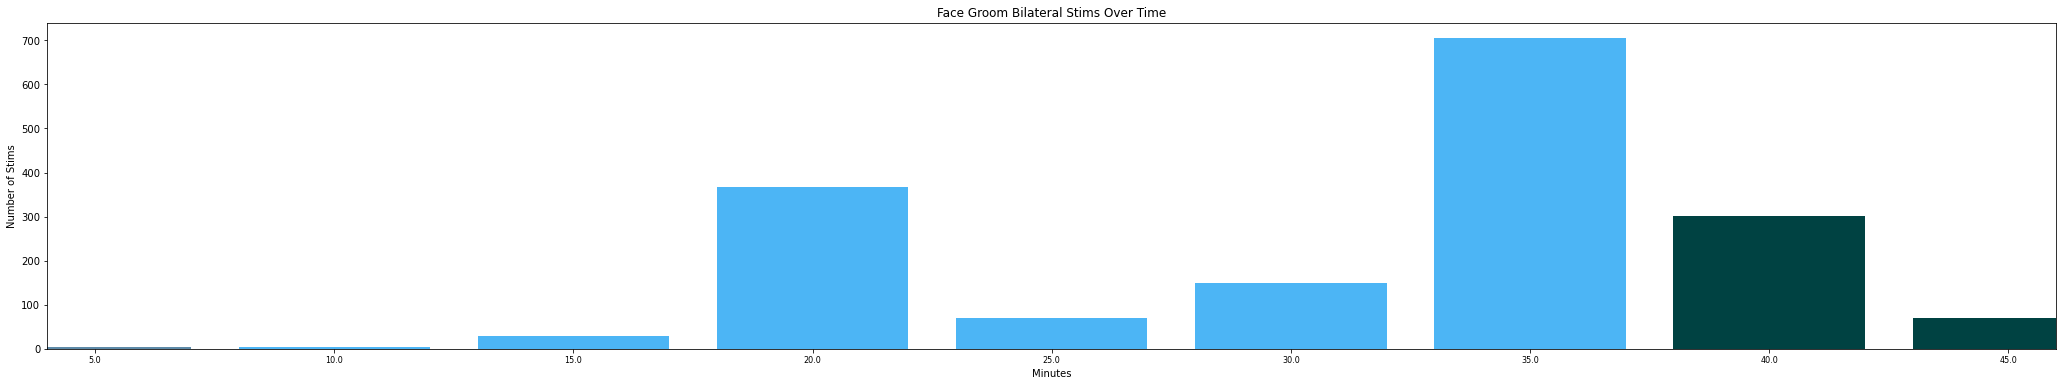

In [23]:
### Check if the user wants to change the time increment
change_time_increment = input("Do you want to change the time increment? (y/n): ")

if change_time_increment.lower() == "y":
    # Ask the user to input the time interval in minutes
    while True:
        try:
            time_interval = float(input("Enter the time interval (in minutes): "))
            break
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

    # Set the time start and increase based on the user input
    time_interval_start = int(time_interval * 600)
    time_increase = int(time_interval * 600)
else:
    # Default time increment of 5 minutes
    time_interval_start = 3000
    time_increase = 3000
    time_interval = 5
    
# Define the required first element value
required_first_element = behavior_of_interest #sets the variable first element to be eqaul to the behavior of interest 

# Filter the tuples based on the required first element value
filtered_taab = [(sub_tuple[0], sub_tuple[1], sub_tuple[2]) for sub_tuple in time_array_and_behavior if sub_tuple[0] == required_first_element and sub_tuple[1]>=3]

print(filtered_taab)

binned_elements = []
current_bin = []
last_interval = None

for x in filtered_taab:
    if x[2] <= time_interval_start:
        current_bin.append(x[1])
    else:
        while x[2] > time_interval_start:
            if current_bin:
                binned_elements.append((time_interval_start, current_bin))
                current_bin = []  # Clear the current_bin after appending it
            else:
                binned_elements.append((time_interval_start, [0]))
            last_interval = time_interval_start

            time_interval_start += time_increase

            if x[2] <= time_interval_start:
                break

        current_bin.append(x[1])

# Append the last time interval with elements or zero
if current_bin:
    binned_elements.append((time_interval_start, current_bin))
else:
    binned_elements.append((time_interval_start, [0]))

# Print the time start intervals and their elements
for interval, elements in binned_elements:
    print("Interval:", interval)
    print("Elements:", elements)
    print()


# Count the stims in each bin   
interval_counts_1 = [sum(elements) for interval,elements in binned_elements]
print(interval_counts_1)
print('Stim count during 30 minutes stim: ',sum(interval_counts_1[1:7]))

interval_counts = [((index * time_interval) + time_interval,count) for index,count in enumerate(interval_counts_1)]
#print(interval_counts)

# Calculate the bar width based on the time interval
bar_width = time_interval * 0.8

# Increase the figure size
plt.figure(figsize=((len(interval_counts) * bar_width), 6))

# Plotting the bar graph
x_values = [interval[0] for interval in interval_counts]
y_values = [interval[1] for interval in interval_counts]
# Limit x-axis value to 65
#x_values = [min(x, ((int(length_of_session))/600)) for x in x_values]

# Create a bar chart with custom colors and adjusted bar width
color_base = '#5d8aa8'
color_stim = '#4cb5f5'
color_post = '#004242'

color_map = []
for interval in interval_counts:
    if interval[0] <= 5:
        color_map.append(color_base)
    elif 5 < interval[0] < 40:
        color_map.append(color_stim)
    else:
        color_map.append(color_post)

plt.bar(x_values, y_values, width=bar_width, color=color_map)

# Add labels and title
plt.xlabel('Minutes')
plt.ylabel('Number of Stims') 
title_text = behavior_name + str(type_of_fiber_connection) + ' Stims Over Time'
if trial_type:
    title_text += ' ' + trial_type

plt.title(title_text)

# Set x-axis tick labels
if time_interval < 1:
    tick_positions = np.arange(5, ((math.ceil(length_of_session/600))+time_interval), 5)  # Tick labels starting from 5 and increasing by 5
    tick_labels = [str(int(time)) for time in tick_positions]
else:
    tick_positions = np.arange(time_interval, ((math.ceil(length_of_session/600))+time_interval), time_interval)  # Tick labels starting from time_interval and increasing by time_interval
    tick_labels = [f'{time:.1f}' for time in tick_positions]

plt.xticks(tick_positions, tick_labels, fontsize=8)
plt.xticks(tick_positions, tick_labels, fontsize=8)
plt.yticks(fontsize=10)

# Set the x-axis limits to only include the minimum and maximum x-axis values
x_min = min((x - 1) for x in x_values)
x_max = max((x +1) for x in x_values)
plt.xlim(x_min, x_max)

root = tk.Tk()
root.withdraw()
folder_path = filedialog.askdirectory()

if folder_path:
    # Save the histogram to the selected folder
    # Get the title as the file name
    title_text = plt.gca().get_title()
    file_name = title_text + '.png'
    save_path = os.path.join(folder_path, file_name)
    
    plt.savefig(save_path)
    # Show the plot
    plt.show()

# Duration vs Time 

The average duration: 1.06313361579319  seconds


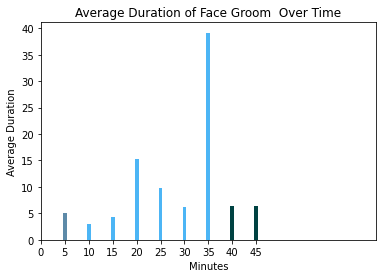

In [21]:
# Calculate the average of each bin
interval_duration = [sum(elements) / len(elements) for interval, elements in binned_elements if any(element > 0 for element in elements)]
#print(interval_duration)
print('The average duration:',(((sum(interval_duration))/(len(interval_duration))) / 10), ' seconds')

interval_duration = [sum(elements) / len(elements) for interval, elements in binned_elements]
#print(interval_duration)

#for i, (interval, _) in enumerate(binned_elements):
    #if any(element > 0 for element in binned_elements[i][1]):
        #print("Interval:", interval / 600)  # Divide by 600 to convert to minutes
        #print("Duration:", interval_duration[i])
        #print()

color_map = []
intervals = [interval / 600 for interval, _ in binned_elements]  # Divide by 600 to convert to minutes
for interval in intervals:
    if interval <= 5:
        color_map.append(color_base)
    elif 5 < interval < 40:
        color_map.append(color_stim)
    else:
        color_map.append(color_post)


plt.bar([(i * time_interval) + time_interval for i in range(len(interval_duration))], interval_duration, color=color_map)
max_duration = max(interval_duration)

# Add labels and title
plt.xlabel('Minutes')
plt.ylabel('Average Duration')
title_text = 'Average Duration of ' + behavior_name + ' Over Time'

if trial_type:
    title_text += ' ' + trial_type

plt.title(title_text)

# Set the x-axis ticks
tick_positions = [i * 5 for i in range(len(interval_duration)+1)] # Added 1 to include the last tick
plt.xticks(tick_positions)

# Limit the x-axis range to 65 minutes
plt.xlim(0, 70)
# Set the y-axis limits to include 0
plt.ylim(bottom=0)
# Select the folder using a file dialog
root = tk.Tk()
root.withdraw()
folder_path = filedialog.askdirectory()

if folder_path:
    # Save the histogram to the selected folder
    # Get the title as the file name
    title_text = plt.gca().get_title()
    file_name = title_text + '.png'
    save_path = os.path.join(folder_path, file_name)
    
    plt.savefig(save_path)
    # Show the plot
    plt.show()

# Duration vs Time for 1 specific time period

# Select the specific interval you want to plot (e.g., first interval)
interval_index = 1

if interval_index < len(binned_elements):
    selected_interval = binned_elements[interval_index]

    # Generate x-axis values for the time window of 0-5 minutes
    x_values = np.linspace(5, 10, len(selected_interval)) #change the numbers here for whatever time frame youre look at currently it is 5 minutes to 10 minutes

    # Plot the selected interval
    plt.plot(x_values, selected_interval)

    # Add labels and title
    plt.xlabel('Time (minutes)')
    plt.ylabel('Duration')
    plt.title('Duration of Behavior ' + str(behavior_of_interest) + ' - Interval ' + str(interval_index + 1))
else:
    print("No binned elements in the selected interval.")

# Select the folder using a file dialog
root = tk.Tk()
root.withdraw()
folder_path = filedialog.askdirectory()

if folder_path:
    # Save the plot to the selected folder
    # Get the title as the file name
    title_text = plt.gca().get_title()
    file_name = title_text + '.png'
    save_path = os.path.join(folder_path, file_name)
    
    plt.savefig(save_path)

# Display the plot or message
plt.show()


# Bout vs Time 

Total Number Of Bouts: 140


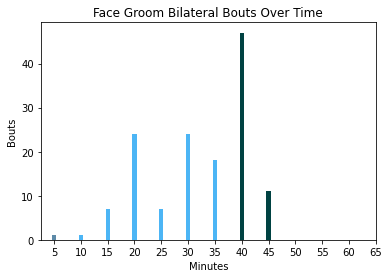

In [22]:
interval_lengths = [(interval, len(elements), elements) for interval, elements in binned_elements if all(element > 0 for element in elements)]
#for interval, length, elements in interval_lengths:
    #print("Interval:", interval)
    #print("Number of Bouts:", length)
    #print("Bouts:", elements)
    #print()

total_bouts = sum(length for _, length, _ in interval_lengths)
print('Total Number Of Bouts:', total_bouts)

intervals = [interval/600 for interval, _, _ in interval_lengths]
num_bouts = [length for _, length, _ in interval_lengths]

bar_width = 0.8  # Adjust this value to change the width of the bars

# Assuming you have the intervals and the corresponding number of bouts in separate lists
intervals = [interval / 600 for interval, _, _ in interval_lengths]
num_bouts = [length for _, length, _ in interval_lengths]


# Create a color map based on the intervals
color_map = []
for interval in intervals:
    if interval <= 5:
        color_map.append(color_base)  
    elif 5 < interval < 40:
        color_map.append(color_stim)  
    else:
        color_map.append(color_post)  

# Plotting the data as a bar plot with custom colors
plt.bar(intervals, num_bouts, width=bar_width, align='center', color=color_map)
# Set the labels and title
plt.xlabel('Minutes')
plt.ylabel('Bouts')
title_text = behavior_name + type_of_fiber_connection + ' Bouts Over Time'

if trial_type:
    title_text += ' ' + trial_type

plt.title(title_text)

tick_positions = np.arange(5, 70, 5)
plt.xticks(tick_positions)

root = tk.Tk()
root.withdraw()
folder_path = filedialog.askdirectory()

if folder_path:
    # Save the histogram to the selected folder
    # Get the title as the file name
    title_text = plt.gca().get_title()
    file_name = title_text + '.png'
    save_path = os.path.join(folder_path, file_name)
    
    plt.savefig(save_path)
    # Show the plot
    plt.show()

# DO NOT USE CODE BELOW!!!!

# # DO NOT USE CODE BELOW!!!!

# DO NOT USE CODE BELOW!!!!

# Bout vs Time 

### This allows for intervals without any matching elements to be placed in the binned elements 

time_interval_start= 3000  #starts off with a bin of 5 minutes
time_increase= 3000   # increases each bin by 5 minutes
# Define the required first element value
required_first_element = behavior_of_interest #sets the variable first element to be eqaul to the behavior of interest 

# Filter the tuples based on the required first element value
filtered_taab = [tuple for tuple in time_array_and_behavior if tuple[0] == required_first_element]

print(filtered_taab)

# Bin the tuples by 5-minute intervals based on the second element of each tuple
binned_elements = []
current_bin = []
for tuple in filtered_taab:
    if tuple[1] <= time_interval_start:
        current_bin.append(tuple[1])
    else:
        binned_elements.append(current_bin)
        current_bin = [tuple[1]]
        time_interval_start += time_increase

# Check if there are any remaining elements in the current bin
if current_bin:
    binned_elements.append(current_bin)

filtered_binned_elements = []
for bin in binned_elements:
    consecutive_groups = []
    current_group = [bin[0]]
    for i in range(1, len(bin)):
        if bin[i] == bin[i-1] + 1:
            current_group.append(bin[i])
        else:
            consecutive_groups.append(current_group)
            current_group = [bin[i]]
    consecutive_groups.append(current_group)

    consecutive_groups = [group for group in consecutive_groups if len(group) >= 3]
    for group in consecutive_groups:
        filtered_binned_elements.extend(group)

binned_elements = [filtered_binned_elements]

# Count the stims in each bin   
interval_counts = [sum(interval) for interval in binned_elements]
print(interval_counts)

# Print the number of bins
num_bins = len(binned_elements)
print(f"Number of Intervals: {num_bins}")
#for interval_index, second_elements_in_interval in enumerate(binned_elements):
   # print(f"Interval {interval_index}: {second_elements_in_interval}")

# Create a bar chart with custom colors
color_base = 'blue'
color_stim = 'red'
color_post = 'yellow'

# Get the bin indices
bin_indices = [i for i in range(len(interval_counts))]

# Plotting the histogram with different colors for different sections
plt.bar(bin_indices[0], interval_counts[0], width=0.45, color=color_base)
plt.bar(bin_indices[1:7], interval_counts[1:7], width=0.45, color=color_stim)
plt.bar(bin_indices[7:13], interval_counts[7:13], width=0.45, color=color_post)

# Add labels and title
plt.xlabel('Minutes')
plt.ylabel('Number of Stims') 
plt.title(f'Behavior '+  str(behavior_of_interest)+  ' Contralateral Stims Over Time')

x_ticks = [i for i in range(len(interval_counts))]  # Adjust the tick positions based on the length of interval_counts
tick_labels = [(i * 5) +5  for i in range(len(interval_counts))]  # Adjust the labels based on the length of interval_counts

plt.xticks(x_ticks, tick_labels)

# Select the folder using a file dialog
root = tk.Tk()
root.withdraw()
folder_path = filedialog.askdirectory()

if folder_path:
    # Save the histogram to the selected folder
    # Get the title as the file name
    title_text = plt.gca().get_title()
    file_name = title_text + '.png'
    save_path = os.path.join(folder_path, file_name)
    
    plt.savefig(save_path)
#show the plot
    plt.show()

#Calculate the average of each bin
bin_averages = [sum(interval) / len(interval) for interval in binned_elements]
#print(num_intervals)

# Create a histogram
plt.hist(bin_averages, bins=num_bins)

# Add labels and title
plt.xlabel('Deciseconds') # Has To Change to 5 Minute Intervals 
plt.ylabel('Average Duration')
plt.title('Distribution of Behavior ' + str(behavior_of_interest) + ' over Time')

# Show the plot
plt.show()


# Calculate the average of each bin
bin_elements = binned_elements[1]
print (len(bin_elements))

plt.plot([i * 1 for i in range(len(bin_elements))], bin_elements)

# Add labels and title
plt.xlabel('Minutes')
plt.ylabel('Individual Elements')
plt.title('Individual Elements within Interval')

# Select the folder using a file dialog
root = tk.Tk()
root.withdraw()
folder_path = filedialog.askdirectory()

if folder_path:
    # Save the plot to the selected folder
    # Get the title as the file name
    title_text = plt.gca().get_title()
    file_name = title_text + '.png'
    save_path = os.path.join(folder_path, file_name)
    
    plt.savefig(save_path)

# Show the plot
plt.show()

# Finding bouts with the filtered time array (before when Time and behavior array was only behavior and time )

#print(filtered_taab)

def find_consecutive_tuples(tuples):
    consecutive_groups = []
    consecutive_group = []

    for i in range(len(tuples)):
        if i == 0 or tuples[i][1] == tuples[i-1][1] + 1:
             consecutive_group.append(tuples[i][1])  # Save only the second element
        else:
            consecutive_groups.append(consecutive_group)
            consecutive_group = [tuples[i][1]]  # Save only the second element

    if consecutive_group:
        consecutive_groups.append(consecutive_group)

    return consecutive_groups

consecutive_groups = find_consecutive_tuples(filtered_taab)
#print (len(consecutive_groups)) #this number should match the number of bouts that were calculated in 1st bout section 
#print(consecutive_groups)

def bin_consecutive_groups(consecutive_groups):
    max_bins = 15  # Maximum number of bins (counting up to what would be considered 70 if counting by 5)
    bins = [0] * max_bins  # Initialize the bins with counters set to zero
    bin_step = 3000  # Define the bin step size
    bin_limits = [i * bin_step for i in range(1, max_bins + 1)]  # Calculate the bin limits

    for group in consecutive_groups:
        last_element = group[-1]  # Get the last element of the group

        # Check which bin the last element falls into
        for i, limit in enumerate(bin_limits):
            if last_element <= limit:
                bins[i] += 1  # Increment the counter for the corresponding bin
                break

    return bins

# Assuming you have the 'consecutive_groups' list defined
bins = bin_consecutive_groups(consecutive_groups)

# Generate the bin index labels
bin_indices = np.arange(5, len(bins)*5 + 5, 5)


# Plotting the histogram with different colors for different sections
plt.bar(bin_indices[0], bins[0], width=3, color=color_base)
plt.bar(bin_indices[1:7], bins[1:7], width=3, color=color_stim)
plt.bar(bin_indices[7:13], bins[7:13], width=3, color=color_post)

# Plotting the histogram
plt.xlabel('Minutes')
plt.ylabel('Bouts')
plt.title( 'Behavior '+ str (behavior_of_interest) + ' Contralateral Bouts Over Time')
plt.xticks(bin_indices)  # Set the x-axis ticks to the bin indices
plt.xlim(0, 70)  # Set the x-axis limit to include up to what would be considered 70 if counting by 5

# Select the folder using a file dialog
root = tk.Tk()
root.withdraw()
folder_path = filedialog.askdirectory()

if folder_path:
    # Save the histogram to the selected folder
    # Get the title as the file name
    title_text = plt.gca().get_title()
    file_name = title_text + '.png'
    save_path = os.path.join(folder_path, file_name)
    
    plt.savefig(save_path)
#show the plot
    plt.show()

# Extra Code that works , but decided Not to USE 

def bin_consecutive_groups(consecutive_groups):
    max_bins = 15  # Maximum number of bins (multiple of 5)
    bins = [0] * max_bins  # Initialize the bins with counters set to zero
    bin_step = 3000  # Define the bin step size
    bin_limits = [i * bin_step for i in range(1, max_bins + 1)]  # Calculate the bin limits

    for group in consecutive_groups:
        last_element = group[-1]  # Get the last element of the group

        # Check which bin the last element falls into
        for i, limit in enumerate(bin_limits):
            if last_element <= limit:
                bins[i] += 1  # Increment the counter for the corresponding bin
                break

    return bins

# Assuming you have the 'consecutive_groups' list defined
bins = bin_consecutive_groups(consecutive_groups)
print(bins)
# Generate the bin index labels
bin_indices = np.arange(5, len(bins)*5 + 5, 5)

# Plotting the histogram
plt.bar(bin_indices, bins)
plt.xlabel('Minutes')
plt.ylabel('Bouts')
plt.title('Number Of Bouts')
plt.xticks(bin_indices)  # Set the x-axis ticks to the bin indices
plt.show()


#def bin_consecutive_groups(consecutive_groups):
    max_bins = 20 # Maximum number of bins
    bins = [0] * max_bins  # Initialize the bins with counters set to zero
    bin_step = 3000  # Define the bin step size
    bin_limits = [3000 + i * bin_step for i in range(max_bins - 1)]  # Calculate the bin limits

    for group in consecutive_groups:
        last_element = group[-1]  # Get the last element of the group

        # Check which bin the last element falls into
        for i, limit in enumerate(bin_limits):
            if last_element <= limit:
                bins[i] += 1  # Increment the counter for the corresponding bin
                break
        else:
            bins[-1] += 1  # If the last element is greater than the last bin limit, increment the counter for the last bin

    return bins


#bins = bin_consecutive_groups(consecutive_groups)
#print(bins)


# Generate the bin index labels
#bin_indices = np.arange(5, len(bins)*5 + 5, 5)

# Plotting the histogram
plt.bar(range(len(bins)), bins)
plt.xlabel('Minutes')
plt.ylabel('Bouts')
plt.title('Number of Bouts')
plt.show()

# KayCei's Orginal Code with Eric's Practice List

#creating a list
#Random_list=[1,1,1,3,3,4,4,4,1,1,4,4,4,2,3,3,3,3,3,3,3,4,4,3,3,99999]

#creating a for loop to identify consecutive numbers and count duration
behavior_type_and_duration=[] #creates a empty list
current_value= Random_List[0] #makes the variable current_vale equal to the first value of random list 
count = 0 #sets counter to zero 
for value in Random_List: 
    if value == current_value:
        count +=1
    else:
        behavior_type_and_duration.append((current_value,count))
        current_value= value
        count=1

#print(behavior_type_and_duration)

#finds the number of bouts of a certain action
count = 0 #sets counter to zero
behavior_of_interest= 4  
for x in behavior_type_and_duration:
    if x[0]==behavior_of_interest: 
        count +=1
    
print(count,"bout(s) of behavior",behavior_of_interest) #print the bouts found 


#find the sum of the duration 
Duration_of_behavior_type=[]
count=0 
for x in behavior_type_and_duration:
    if x[0] == behavior_of_interest:
        Duration_of_behavior_type.append((x[1]))
        
#print(Duration_of_behavior_type)        #this is to make sure you have the right values selected for 

#stim count calculation
Stim_count=(sum(Duration_of_behavior_type))
print("Behavior",behavior_of_interest, "was stimmed", Stim_count, "times")


from statistics import mean 
duration_average= mean(Duration_of_behavior_type)

print ("The average duration of behavior", behavior_of_interest, "is",duration_average)